In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data     
y = digits.target   
print(X.shape, y.shape)

(1797, 64) (1797,)


In [3]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_2d = tsne.fit_transform(X)
print(X_2d.shape)

(1797, 2)


In [7]:
import warnings
warnings.filterwarnings(
    "ignore", category=FutureWarning
)


In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_2d)

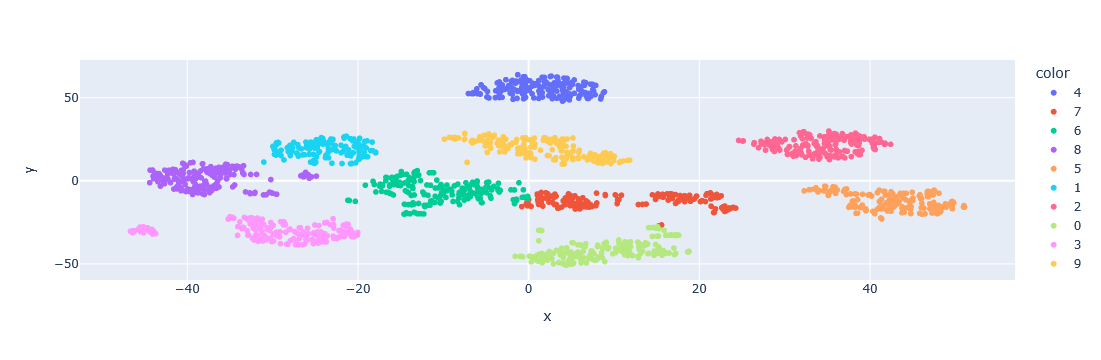

In [11]:
import plotly.express as px

fig = px.scatter(
    x=X_2d[:,0],
    y=X_2d[:,1],
    color=clusters.astype(str),
    hover_data={'label': y}
)
fig.show()

In [13]:
import numpy as np
np.bincount(clusters)


array([193, 144, 181, 194, 178, 178, 194, 170, 181, 184], dtype=int64)

In [15]:
from collections import Counter

for c in range(10):
    labels = y[clusters == c]
    print(f"Cluster {c} → {Counter(labels).most_common(1)}")


Cluster 0 → [(7, 179)]
Cluster 1 → [(9, 143)]
Cluster 2 → [(6, 180)]
Cluster 3 → [(2, 167)]
Cluster 4 → [(0, 178)]
Cluster 5 → [(4, 178)]
Cluster 6 → [(8, 170)]
Cluster 7 → [(1, 144)]
Cluster 8 → [(3, 179)]
Cluster 9 → [(5, 180)]


In [17]:
correct = 0
for c in range(10):
    labels = y[clusters == c]
    if len(labels) > 0:
        correct += Counter(labels).most_common(1)[0][1]

accuracy = correct / len(y)
print(accuracy)

0.9449081803005008


In [19]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_2d, clusters)
print(score)


0.6419638


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range = range(3, 16)

silhouette_scores = []
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_2d)

    sil_score = silhouette_score(X_2d, labels)
    silhouette_scores.append(sil_score)
    inertia_values.append(kmeans.inertia_)

# Best k based on highest silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]

print("Silhouette scores:", silhouette_scores)
print("Best k (Silhouette):", best_k)


Silhouette scores: [0.43347725, 0.4182017, 0.45317003, 0.49345076, 0.5575293, 0.6111337, 0.6304407, 0.6419638, 0.6361189, 0.6229459, 0.59993464, 0.59157133, 0.55412424]
Best k (Silhouette): 10


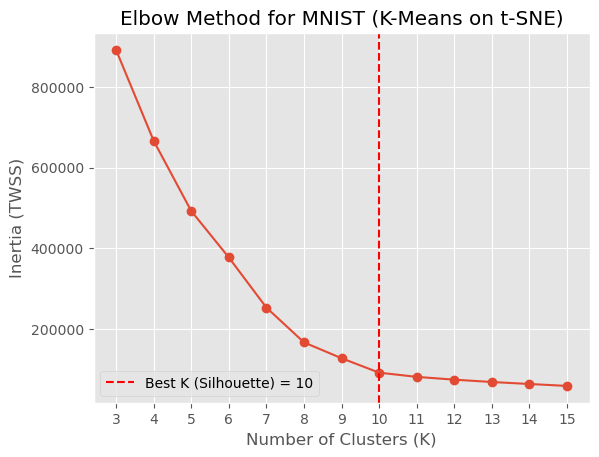

In [23]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xticks(list(k_range))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (TWSS)")
plt.title("Elbow Method for MNIST (K-Means on t-SNE)")

# Vertical dashed line at best_k
plt.axvline(
    x=best_k,
    color='red',
    linestyle='--',
    label=f'Best K (Silhouette) = {best_k}'
)

plt.legend()
plt.show()


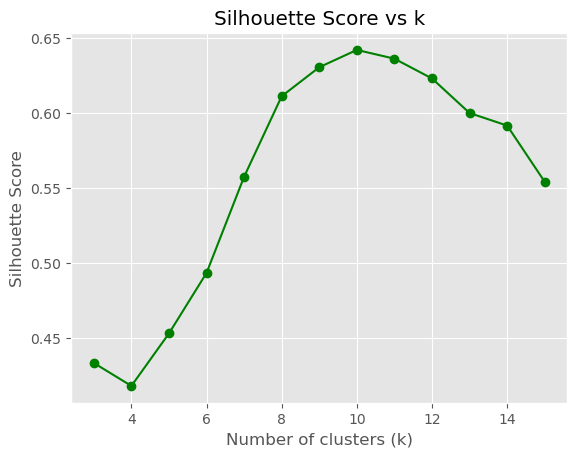

In [25]:
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.show()
